Mushroom Project. To evalute the Class.It is a classification problem.

In [406]:
import math
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [301]:
# Lets begin by reading the csv file
Mushrooms_1=pd.read_csv("mushroom.csv")
Mushrooms_1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [33]:
#Lets convert the csv file into a DataFrame
Mushrooms=pd.DataFrame(data=Mushrooms_1)
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [252]:
Mushrooms.shape
#The dataset has 8124 rows and 23 columns

(8124, 22)

In [253]:
type(Mushrooms)

pandas.core.frame.DataFrame

In [254]:
Mushrooms.dtypes
#All datatypes are objects

class                       int64
cap-shape                   int64
cap-surface                 int32
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int32
veil-color                  int32
ring-number                 int32
ring-type                   int64
spore-print-color           int32
population                  int64
habitat                     int32
dtype: object

In [255]:
Mushrooms.isnull().sum()
#There are no missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:>

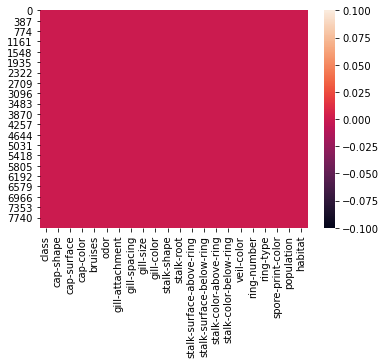

In [256]:
sns.heatmap(Mushrooms.isnull())
#The heatmap plot confirms that there are no missing values

In [ ]:
#first lets check if the target variable is balanced or not

In [257]:
Mushrooms.value_counts("class")
#There is no need to balance the data.

class
0    4208
1    3916
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

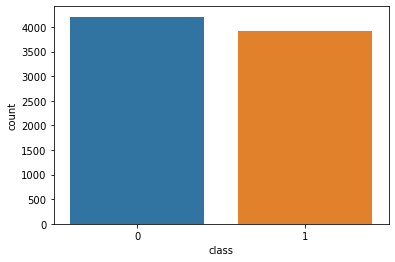

In [258]:
sns.countplot(x="class",data=Mushrooms)
#There is no need to balance the data.

In [259]:
Mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [140]:
#Lets perform univariate analysis on the attributes

<AxesSubplot:xlabel='class', ylabel='count'>

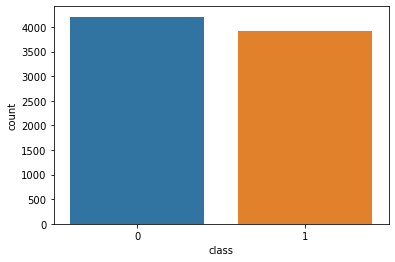

In [260]:
Mushrooms.value_counts("class")
sns.countplot(x="class",data=Mushrooms)
#We can find the total count of classes column

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

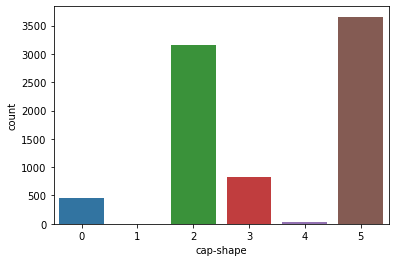

In [261]:
Mushrooms.value_counts("cap-shape")
sns.countplot(x="cap-shape",data=Mushrooms)
#We can find the total count of cap-shape column 


<AxesSubplot:xlabel='cap-surface', ylabel='count'>

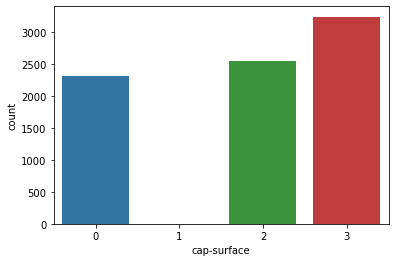

In [262]:
Mushrooms.value_counts("cap-surface")
sns.countplot(x="cap-surface",data=Mushrooms)
#We can find the total count of cap-surface column

<AxesSubplot:xlabel='cap-color', ylabel='count'>

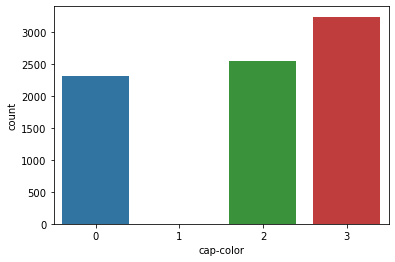

In [264]:
Mushrooms.value_counts("cap-color")
sns.countplot(x="cap-color",data=Mushrooms)
#We can find the total count of cap-color column

<AxesSubplot:xlabel='bruises', ylabel='count'>

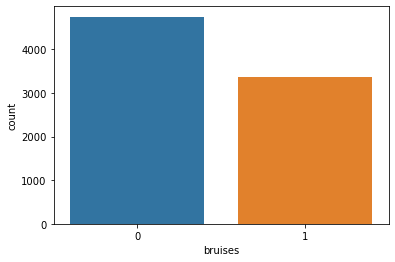

In [148]:
Mushrooms.value_counts("bruises")
sns.countplot(x="bruises",data=Mushrooms)
#We can find the total count of bruises column

<AxesSubplot:xlabel='odor', ylabel='count'>

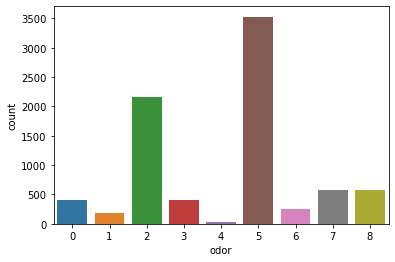

In [265]:
Mushrooms.value_counts("odor")
sns.countplot(x="odor",data=Mushrooms)
#We can find the total count of odor column

<AxesSubplot:xlabel='gill-attachment', ylabel='count'>

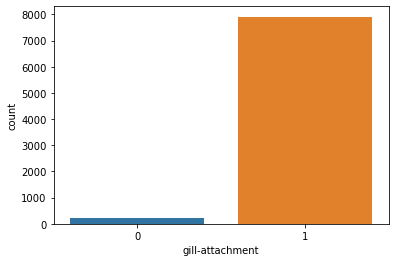

In [154]:
Mushrooms.value_counts("gill-attachment")
sns.countplot(x="gill-attachment",data=Mushrooms)
#We can find the total count of gill-attachment column

<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

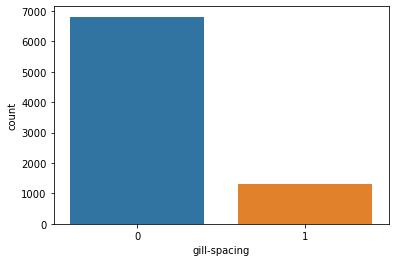

In [266]:
Mushrooms.value_counts("gill-spacing")
sns.countplot(x="gill-spacing",data=Mushrooms)
#We can find the total count of gill-spacing column

<AxesSubplot:xlabel='gill-color', ylabel='count'>

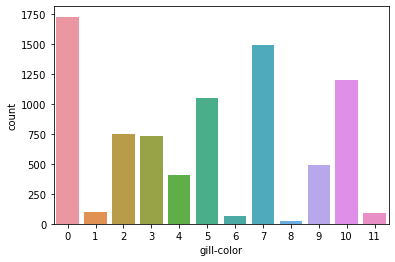

In [156]:
Mushrooms.value_counts("gill-color")
sns.countplot(x="gill-color",data=Mushrooms)
#We can find the total count of gill-color column

<AxesSubplot:xlabel='stalk-shape', ylabel='count'>

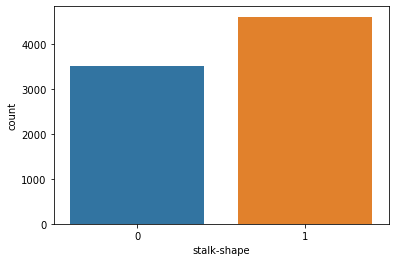

In [267]:
Mushrooms.value_counts("stalk-shape")
sns.countplot(x="stalk-shape",data=Mushrooms)
#We can find the total count of stalk-shape column

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

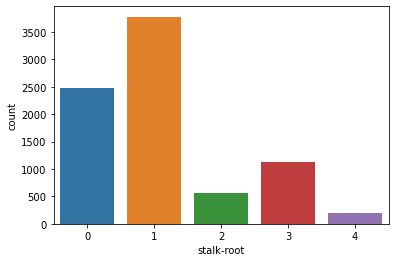

In [158]:
Mushrooms.value_counts("stalk-root")
sns.countplot(x="stalk-root",data=Mushrooms)
#We can find the total count of stalk-root column

<AxesSubplot:xlabel='stalk-surface-above-ring', ylabel='count'>

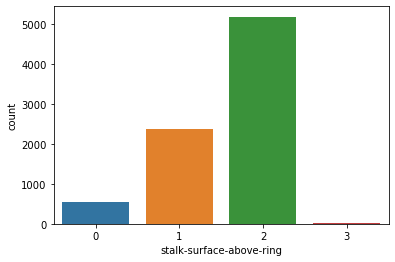

In [268]:
Mushrooms.value_counts("stalk-surface-above-ring")
sns.countplot(x="stalk-surface-above-ring",data=Mushrooms)
#We can find the total count of stalk-surface-above-ring column

<AxesSubplot:xlabel='stalk-surface-above-ring', ylabel='count'>

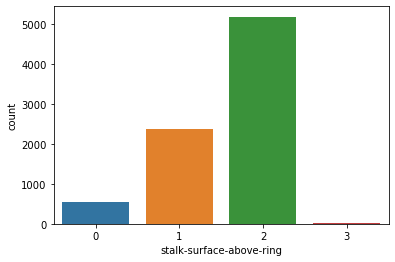

In [269]:
Mushrooms.value_counts("stalk-surface-above-ring")
sns.countplot(x="stalk-surface-above-ring",data=Mushrooms)
#We can find the total count of stalk-surface-above-ring column

<AxesSubplot:xlabel='stalk-surface-below-ring', ylabel='count'>

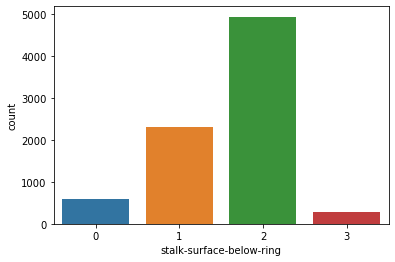

In [270]:
Mushrooms.value_counts("stalk-surface-below-ring")
sns.countplot(x="stalk-surface-below-ring",data=Mushrooms)
#We can find the total count of stalk-surface-below-ring column

<AxesSubplot:xlabel='stalk-color-above-ring', ylabel='count'>

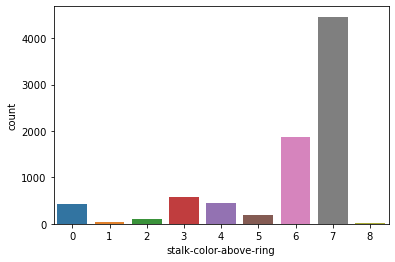

In [271]:
Mushrooms.value_counts("stalk-color-above-ring")
sns.countplot(x="stalk-color-above-ring",data=Mushrooms)
#We can find the total count of stalk-surface-above-ring column

<AxesSubplot:xlabel='stalk-color-below-ring', ylabel='count'>

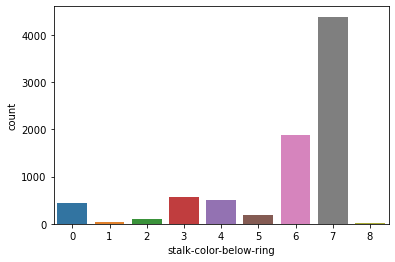

In [275]:
Mushrooms.value_counts("stalk-color-below-ring")
sns.countplot(x="stalk-color-below-ring",data=Mushrooms)
#We can find the total count of stalk-color-below-ring column

In [277]:
#no need to to find for veil type.

<AxesSubplot:xlabel='veil-color', ylabel='count'>

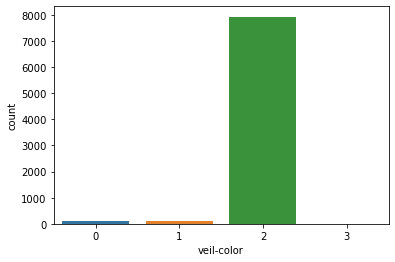

In [278]:
Mushrooms.value_counts("veil-color")
sns.countplot(x="veil-color",data=Mushrooms)
#We can find the total count of veil-color column

<AxesSubplot:xlabel='ring-number', ylabel='count'>

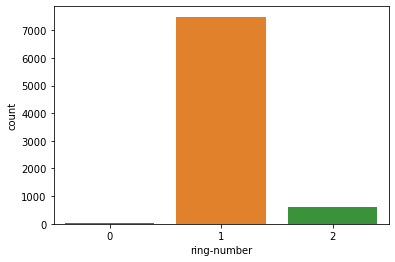

In [279]:
Mushrooms.value_counts("ring-number")
sns.countplot(x="ring-number",data=Mushrooms)
#We can find the total count of ring-number column

<AxesSubplot:xlabel='ring-type', ylabel='count'>

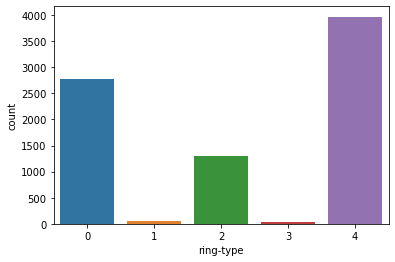

In [280]:
Mushrooms.value_counts("ring-type")
sns.countplot(x="ring-type",data=Mushrooms)
#We can find the total count of ring-type column

<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

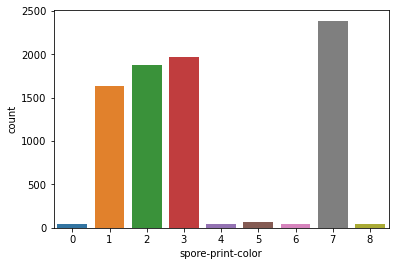

In [281]:
Mushrooms.value_counts("spore-print-color")
sns.countplot(x="spore-print-color",data=Mushrooms)
#We can find the total count of spore-print-color column

<AxesSubplot:xlabel='population', ylabel='count'>

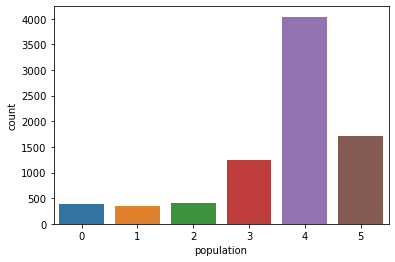

In [282]:
Mushrooms.value_counts("population")
sns.countplot(x="population",data=Mushrooms)
#We can find the total count of population column

<AxesSubplot:xlabel='habitat', ylabel='count'>

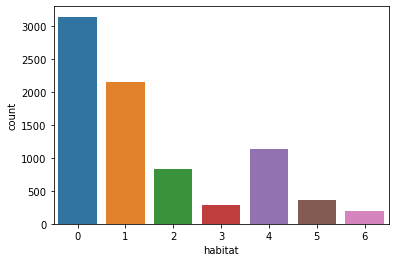

In [283]:
Mushrooms.value_counts("habitat")
sns.countplot(x="habitat",data=Mushrooms)
#We can find the total count of habitat column

In [ ]:
#Lets perform label encoder for target variable

In [284]:
le1=LabelEncoder()
Mushrooms["class"]=le1.fit_transform(Mushrooms["class"])
Mushrooms


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,2,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,2,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,3,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,2,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,2,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,2,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,3,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [ ]:
#Lets perform bivariate analysis 

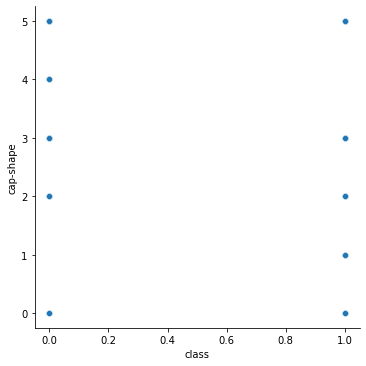

In [285]:
sns.relplot(x="class",y="cap-shape",kind="scatter",data=Mushrooms)
#Cap-shape 4 is not present in poisonous type mushroom

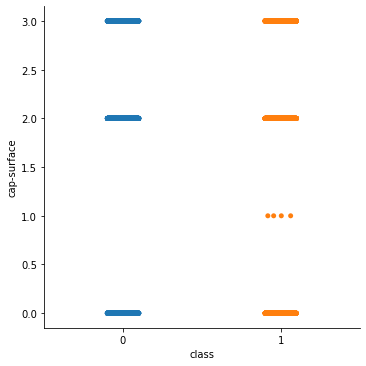

In [286]:
sns.catplot(x="class",y="cap-surface",kind="strip",data=Mushrooms)
#Cap-surface 1 is not present in edible type mushroom

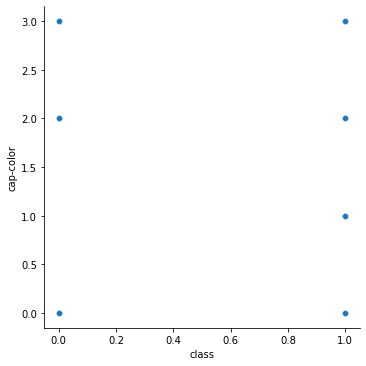

In [287]:
sns.relplot(x="class",y="cap-color",kind="scatter",data=Mushrooms)
#Cap-color 1 is not present in edible type mushroom

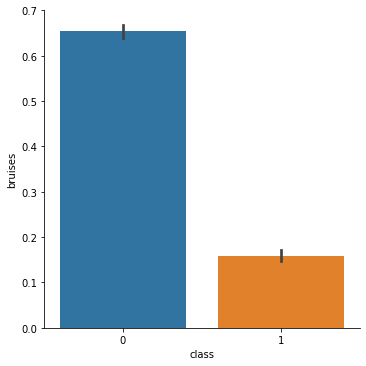

In [288]:
sns.catplot(x="class",y="bruises",kind="bar",data=Mushrooms)
#Edible mushrooms are bruised more than the poisonous ones

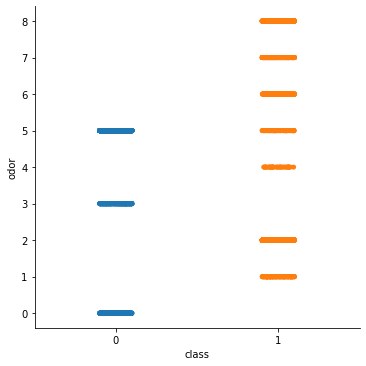

In [289]:
sns.catplot(x="class",y="odor",kind="strip",data=Mushrooms)
#Odor of poisionous mushrooms is more than the edible ones.

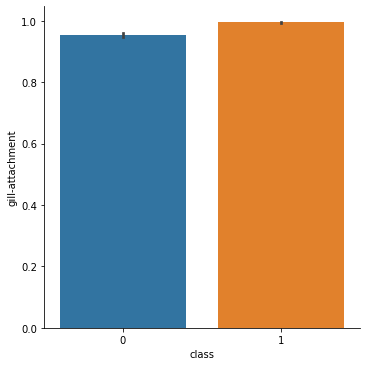

In [290]:
sns.catplot(x="class",y="gill-attachment",kind="bar",data=Mushrooms)
#gill-attachment for posisonous mushrooms is slightly more than the edible mushrooms

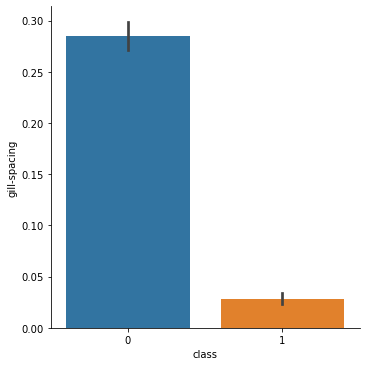

In [291]:
sns.catplot(x="class",y="gill-spacing",kind="bar",data=Mushrooms)
#gill-spacing for edible mushrooms is more than the posisonous mushrooms

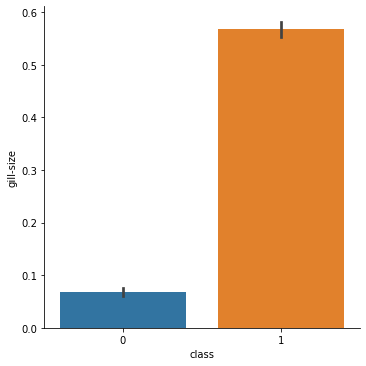

In [292]:
sns.catplot(x="class",y="gill-size",kind="bar",data=Mushrooms)
#gill-size for posisonous mushrooms is more than the edible mushrooms

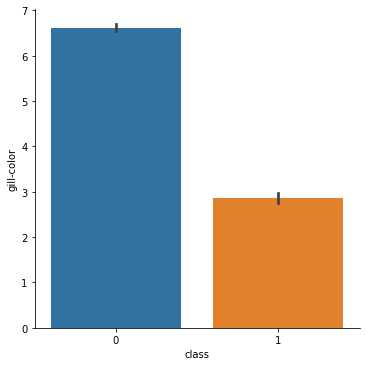

In [293]:
sns.catplot(x="class",y="gill-color",kind="bar",data=Mushrooms)
#gill-color for edible mushrooms is more than the posisonous mushrooms

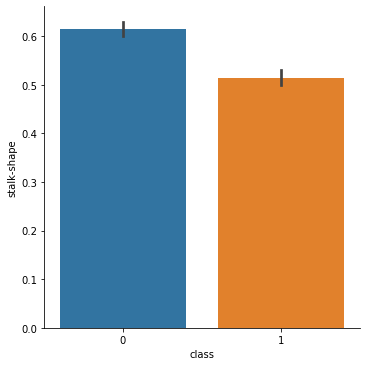

In [294]:
sns.catplot(x="class",y="stalk-shape",kind="bar",data=Mushrooms)
#stalk-shape for edible mushrooms is more than the posisonous mushrooms

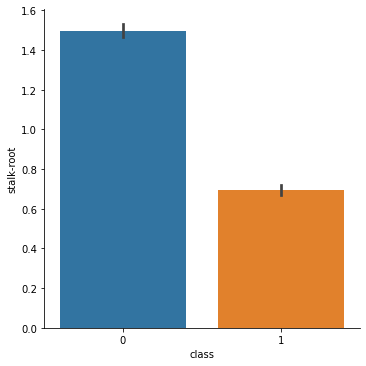

In [295]:
sns.catplot(x="class",y="stalk-root",kind="bar",data=Mushrooms)
#stalk-root for edible mushrooms is more than the posisonous mushrooms

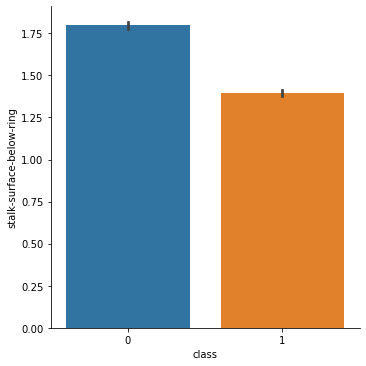

In [296]:
sns.catplot(x="class",y="stalk-surface-below-ring",kind="bar",data=Mushrooms)
#stalk-surface-below-ring for edible mushrooms is more than the posisonous mushrooms

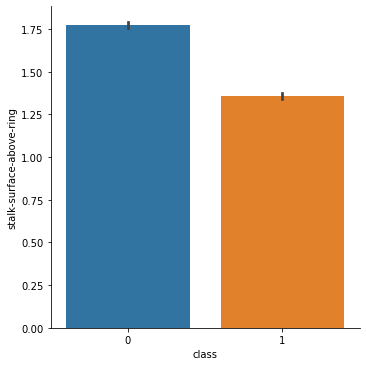

In [297]:
sns.catplot(x="class",y="stalk-surface-above-ring",kind="bar",data=Mushrooms)
#stalk-surface-above-ring for edible mushrooms is more than the posisonous mushrooms

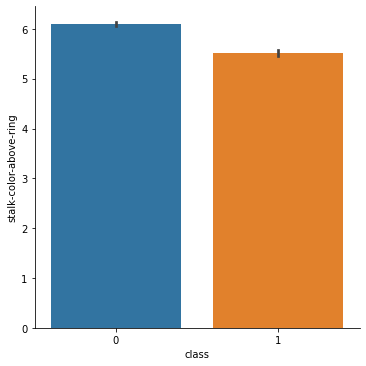

In [298]:
sns.catplot(x="class",y="stalk-color-above-ring",kind="bar",data=Mushrooms)
#stalk-color-above-ring for edible mushrooms is more than the posisonous mushrooms

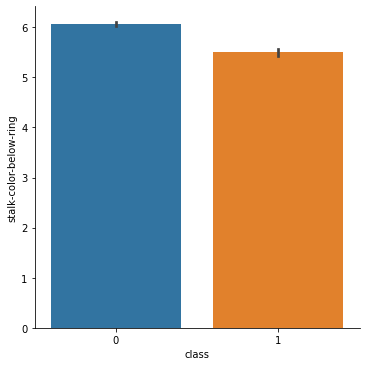

In [299]:
sns.catplot(x="class",y="stalk-color-below-ring",kind="bar",data=Mushrooms)
#stalk-color-below-ring for edible mushrooms is more than the posisonous mushrooms

In [ ]:
#there is no need to plot the veil type as it only has one type of classification

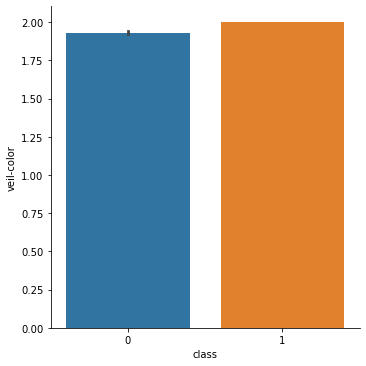

In [217]:
sns.catplot(x="class",y="veil-color",kind="bar",data=Mushrooms)
#veil-color for edible mushrooms is slightly less than the posisonous mushrooms

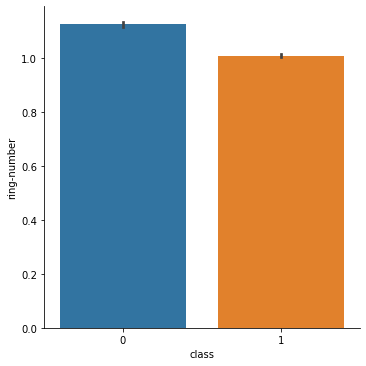

In [218]:
sns.catplot(x="class",y="ring-number",kind="bar",data=Mushrooms)
#ring-number for edible mushrooms is more than the posisonous mushrooms

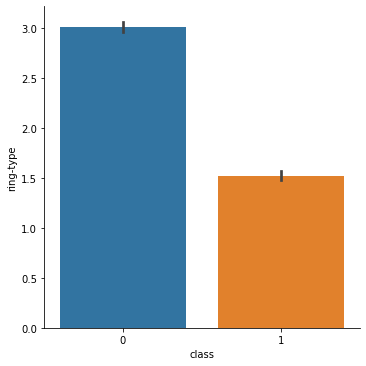

In [219]:
sns.catplot(x="class",y="ring-type",kind="bar",data=Mushrooms)
#ring-type for edible mushrooms is more than the posisonous mushrooms

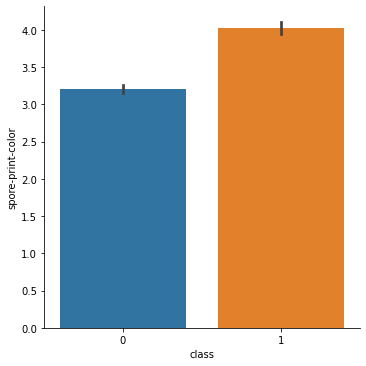

In [220]:
sns.catplot(x="class",y="spore-print-color",kind="bar",data=Mushrooms)
#spore-print-color for edible mushrooms is less than the posisonous mushrooms

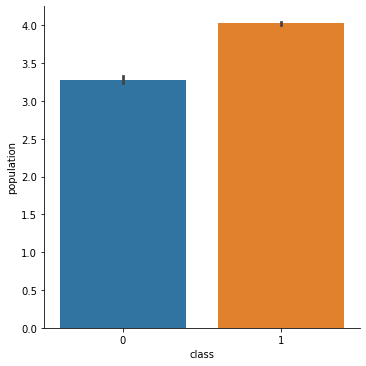

In [221]:
sns.catplot(x="class",y="population",kind="bar",data=Mushrooms)
#population of edible mushrooms is less than the posisonous mushrooms

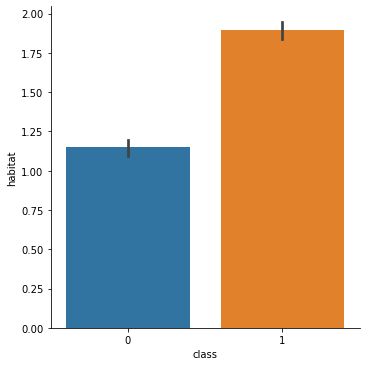

In [222]:
sns.catplot(x="class",y="habitat",kind="bar",data=Mushrooms)
#poisonous mushrroms are found more than edible mushrooms

Since the attributes are all categorical lets convert them using label encoder and there is no need to perform univariate
or bivariate analysis as we cannot learn much from those analysis in this case.

In [94]:
#Lets perform label encoder for independent attributes

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,5,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,0,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,5,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,5,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,5,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,2,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,3,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [176]:
le2=LabelEncoder()
Mushrooms["cap-shape"]=le2.fit_transform(Mushrooms["cap-shape"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [97]:
le3=LabelEncoder()
Mushrooms["cap-surface"]=le3.fit_transform(Mushrooms["cap-surface"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,5,2,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,0,2,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,5,3,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,5,2,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,5,2,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,2,2,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,3,3,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [115]:
le4=LabelEncoder()
Mushrooms["cap-color"]=le4.fit_transform(Mushrooms["cap-surface"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,s,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,s,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,s,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,s,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,s,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,s,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,s,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,s,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,k,7,w,p,w,o,e,w,v,l


In [116]:
le5=LabelEncoder()
Mushrooms["bruises"]=le5.fit_transform(Mushrooms["bruises"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,s,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,s,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,s,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,s,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,s,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,s,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,s,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,s,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,k,7,w,p,w,o,e,w,v,l


In [117]:
le6=LabelEncoder()
Mushrooms["odor"]=le6.fit_transform(Mushrooms["odor"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,s,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,s,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,s,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,s,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,s,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,s,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,s,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,s,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,k,7,w,p,w,o,e,w,v,l


In [118]:
le7=LabelEncoder()
Mushrooms["gill-attachment"]=le7.fit_transform(Mushrooms["gill-attachment"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,s,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,s,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,s,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,s,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,s,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,s,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,s,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,s,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,k,7,w,p,w,o,e,w,v,l


In [119]:
le8=LabelEncoder()
Mushrooms["gill-spacing"]=le3.fit_transform(Mushrooms["gill-spacing"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,s,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,s,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,s,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,s,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,s,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,s,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,s,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,s,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,k,7,w,p,w,o,e,w,v,l


In [120]:
le9=LabelEncoder()
Mushrooms["gill-size"]=le9.fit_transform(Mushrooms["gill-size"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,s,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,s,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,s,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,s,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,s,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,s,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,s,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,s,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,k,7,w,p,w,o,e,w,v,l


In [121]:
le10=LabelEncoder()
Mushrooms["gill-color"]=le10.fit_transform(Mushrooms["gill-color"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,s,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,s,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,s,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,s,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,s,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,s,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,s,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,s,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,k,7,w,p,w,o,e,w,v,l


In [201]:
le11=LabelEncoder()
Mushrooms["stalk-shape"]=le11.fit_transform(Mushrooms["stalk-shape"])
Mushrooms



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [126]:
le12=LabelEncoder()
Mushrooms["stalk-root"]=le12.fit_transform(Mushrooms["stalk-root"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,w,p,w,o,e,w,v,l


In [127]:
le13=LabelEncoder()
Mushrooms["stalk-surface-above-ring"]=le13.fit_transform(Mushrooms["stalk-surface-above-ring"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,w,p,w,o,e,w,v,l


In [128]:
le14=LabelEncoder()
Mushrooms["stalk-surface-below-ring"]=le14.fit_transform(Mushrooms["stalk-surface-below-ring"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,w,p,w,o,e,w,v,l


In [129]:
le15=LabelEncoder()
Mushrooms["stalk-color-above-ring"]=le15.fit_transform(Mushrooms["stalk-color-above-ring"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,w,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,w,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,w,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,w,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,o,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,o,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,o,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,w,p,w,o,e,w,v,l


In [130]:
le16=LabelEncoder()
Mushrooms["stalk-color-below-ring"]=le16.fit_transform(Mushrooms["stalk-color-below-ring"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,p,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,p,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,p,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,p,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,p,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,p,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,p,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,p,w,o,e,w,v,l


In [131]:
le17=LabelEncoder()
Mushrooms["veil-type"]=le17.fit_transform(Mushrooms["veil-type"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,0,w,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,0,w,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,0,w,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,0,w,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,0,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,0,o,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,0,n,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,0,o,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,0,w,o,e,w,v,l


In [132]:
le18=LabelEncoder()
Mushrooms["veil-color"]=le18.fit_transform(Mushrooms["veil-color"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,0,2,o,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,0,2,o,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,0,2,o,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,0,2,o,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,0,2,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,0,1,o,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,0,0,o,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,0,1,o,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,0,2,o,e,w,v,l


In [133]:
le19=LabelEncoder()
Mushrooms["ring-number"]=le19.fit_transform(Mushrooms["ring-number"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,0,2,1,p,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,0,2,1,p,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,0,2,1,p,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,0,2,1,p,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,0,2,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,0,1,1,p,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,0,0,1,p,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,0,1,1,p,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,0,2,1,e,w,v,l


In [135]:
le20=LabelEncoder()
Mushrooms["ring-type"]=le20.fit_transform(Mushrooms["ring-type"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,0,2,1,4,k,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,0,2,1,4,n,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,0,2,1,4,n,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,0,2,1,4,k,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,0,2,1,0,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,0,1,1,4,b,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,0,0,1,4,b,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,0,1,1,4,b,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,0,2,1,0,w,v,l


In [136]:
le21=LabelEncoder()
Mushrooms["spore-print-color"]=le21.fit_transform(Mushrooms["spore-print-color"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,s,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,n,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,n,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,s,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,c,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,v,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,c,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,v,l


In [138]:
le22=LabelEncoder()
Mushrooms["population"]=le22.fit_transform(Mushrooms["population"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,u
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,g
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,m
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,u
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,l
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,l
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,l
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,l


In [139]:
le23=LabelEncoder()
Mushrooms["habitat"]=le23.fit_transform(Mushrooms["habitat"])
Mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,2,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,2,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,2,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,3,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,2,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,2,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,2,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,2,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,3,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [224]:
#lets plot the heatmap for overall relation of the independent variables with the dependent variables

<AxesSubplot:>

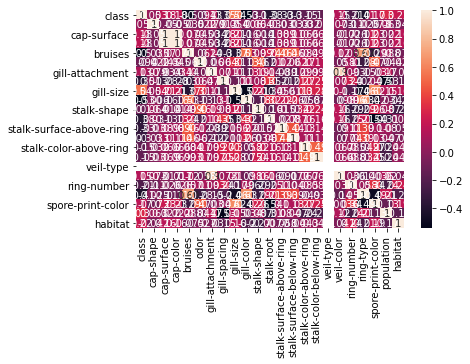

In [225]:
sns.heatmap(Mushrooms.corr(),annot=True)
#since it is not visible we go for another method shown below

In [310]:
Mushrooms1=Mushrooms.corr()
Mushrooms1["class"].sort_values(ascending=False)
#Since veil type seems to have no relation with the target value, it can be dropped


class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
cap-color                   0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

Mushrooms.drop(labels="veil-type",axis=1, inplace=True)
#not able to drop this coulmn. Can you expalin why?However the column is dropped.

In [303]:
#Lets start with ML after separating the dependent and independent variables

In [309]:
x=Mushrooms.drop("class",axis=1)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,2,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,2,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,2,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,3,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,2,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,2,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,2,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,2,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,3,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [308]:
y=Mushrooms.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [312]:
S=StandardScaler()
x=S.fit_transform(x)
x
#Lets use Standard Scaler to scale down the x variables

array([[ 1.02971224,  0.14012794,  0.14012794, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  0.14012794, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  0.14012794, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794,  0.14012794, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039,  0.95327039, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794,  0.14012794, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [319]:
x.shape

(8124, 21)

In [320]:
y.shape

(8124,)

In [382]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 21)
(2438, 21)
(5686,)
(2438,)


In [326]:
#Lets use 4 algorithms. Those are:1)Logistic Regression,2)Decision Tree,3)Naive Bayes(gaussian), 4) Support Vector Classification

In [353]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
#lets predict y values
pred1=lg.predict(x_test)
print(accuracy_score(pred1,y_test))
print(confusion_matrix(pred1,y_test))
print(classification_report(pred1,y_test))
score1=cross_val_score(lg,x,y,cv=7)
print(score1)
print(score1.mean())
print(score1.std())

0.9507793273174734
[[1197   60]
 [  60 1121]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1257
           1       0.95      0.95      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

[0.68819983 0.94229113 0.97502153 0.87596899 0.98534483 0.95344828
 0.82586207]
0.8923052362707536
0.09861613687393155


In [384]:
#Decision Tree classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
#lets predict y values
pred2=dtc.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(dtc,x,y,cv=7)
print(score2)
print(score2.mean())
print(score2.std())

1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

[0.77950043 1.         1.         1.         1.         1.
 0.87586207]
0.950766071375534
0.08199514611473206


In [385]:
#NaiveBayes
GNB=GaussianNB()
GNB.fit(x_train,y_train)
#lets predict y values
pred3=GNB.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))
score3=cross_val_score(GNB,x,y,cv=7)
print(score3)
print(score3.mean())
print(score3.std())

0.9216570959803118
[[1152   86]
 [ 105 1095]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1238
           1       0.93      0.91      0.92      1200

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438

[0.65116279 0.9250646  0.97674419 0.78983635 0.75775862 0.80948276
 0.79051724]
0.8143666492704184
0.09975316057280896


In [386]:
#Support vector classification
svc=SVC()
svc.fit(x_train,y_train)
#lets predict y values
pred4=svc.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))
score4=cross_val_score(svc,x,y,cv=7)
print(score4)
print(score4.mean())
print(score4.std())

1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

[0.77950043 1.         1.         0.99569337 1.         1.
 0.69913793]
0.9249045327834421
0.11933224167701344


In [387]:
#from the above result, it can be conculded that Decision Tree is the best model. Lets now hypertune the parameters using grid search cv

In [399]:
parameters={"criterion":["gini","entropy"],"splitter":["best","random"],"random_state":[42],"max_leaf_nodes":[5]}
grid=GridSearchCV(dtc,parameters)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5], 'random_state': [42],
                         'splitter': ['best', 'random']})

In [405]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_leaf_nodes': 5, 'random_state': 42, 'splitter': 'best'}
0.9588438418246767
DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=42)


In [ ]:
#Now put these best paramters back into the decision tree model

In [403]:
dtc=DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=5,random_state=42,splitter="best")
dtc.fit(x_train,y_train)
#predict y values again
pred2=dtc.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))


0.9532403609515997
[[1173   30]
 [  84 1151]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1203
           1       0.97      0.93      0.95      1235

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



Lets perform Serialisation and deserialisation to dump (save) and load the model
joblib.dump(dtc,"dtcfile.obj")

In [407]:
joblib.dump(dtc,"dtcfile.obj")
#obj file is dumped or created
dtc_from_joblib=joblib.load("dtcfile.obj")
#obj file is loaded
dtc_from_joblib.predict(x_test)
#use the loaded model to make predictions.

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)